In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Задание №1
Проведите первичный анализ данных: 
 - изучите типы переменных, 
 - наличие пропусков, 
 - статистические характеристики.

In [2]:
df_wine = pd.read_csv('data/WineQT.csv', sep=',', index_col='Id')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Описание:
Эти наборы данных относятся к красным вариантам португальского вина "Vinho Verde". 
Набор данных описывает количество различных химических веществ, присутствующих в вине, и их влияние на его качество. Наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих). Ваша задача — предсказать качество вина, используя заданные данные.

Простой, но сложный проект по прогнозированию качества вина.
Сложность возникает из-за того, что набор данных содержит меньше образцов и  несбалансирован.

Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):\
- 1 - fixed acidity - фиксированная кислотность\
- 2 - volatile acidity - летучая кислотность\
- 3 - citric acid - лимонная кислота\
- 4 - residual sugar - остаточный сахар\
- 5 - chlorides- хлориды\
- 6 - free sulfur dioxide - свободный диоксид серы\
- 7 - total sulfur dioxide - общий диоксид серы\
- 8 - density - плотность\
- 9 - Винная кислота - pH\ (обычно вино имеет показатель pH от 3 до 4)
- 10 - sulphates - сульфаты\
- 11 - alcohol - спирт\
- 12 - quality - качество (балл от 0 до 10)

Детализация признаков
Фиксированная кислотность обусловлена наличием нелетучих кислот в
вине. Например, винная, лимонная или яблочная кислоты. Данный тип кислот
участвует в сбалансированности вкуса вина, привносит свежесть вкусу.
1. Летучая кислотность обусловлена наличием летучих кислот в вине,
например, таких как уксусная кислота.
2. Остаточный сахар - характеристика, показывающая количество сахара,
который не был превращен в спирт в процессе ферментации вина. Участвует в
сладости вкуса вина.
3. Диоксид серы (они же сульфиты) используются в виноделии в качестве
безопасного антисептика. Сульфиты не дают вину скисать и потерять свои вкусовые качества. Присутствуют в вине в свободном виде (газообразном) и
связанном виде (соединившись с водой).
4. Характеристика рН может выступать характеристикой цвета вина. Вина с
высоким pH темнее и имеют фиолетовый оттенок цвета. Вина с низким pH
светлее и имеют ярко-розовый и ярко-красный оттенок цвета.

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [4]:
df_wine.duplicated().sum()

125

1. Данные состоят из 1143 наблюдений (строк) и 11 переменных (столбцов).
2. Все переменные, кроме 'quality', имеют вещественный тип данных (float64), что указывает на то, что они представляют собой непрерывные числовые значения.
3. Переменная 'quality' имеет тип int64 и является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.
4. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (1143).
5. Дубликаты есть (125 значений), но так как названий вина нет в датасете, то дубликаты могут быть просто совпадениями характеристик вина, относящиеся к разным винам, и удалить мы их не можем. 

In [5]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


### Задание №2
1. Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.
2. Постройте столбчатые диаграммы для анализа распределения категориальных переменных.

In [6]:
df_continuous = df_wine[[feature for feature in df_wine.columns if feature not in 'quality']]

In [7]:
#df_continuous = df_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']]

Ниже графически представлены данные описательной статистики
признаков. Для каждого признака построен график распределения, а
также ящик с усами. Эти графики позволяют изучить распределение значений и
визуально проверить данные на наличие выбросов.

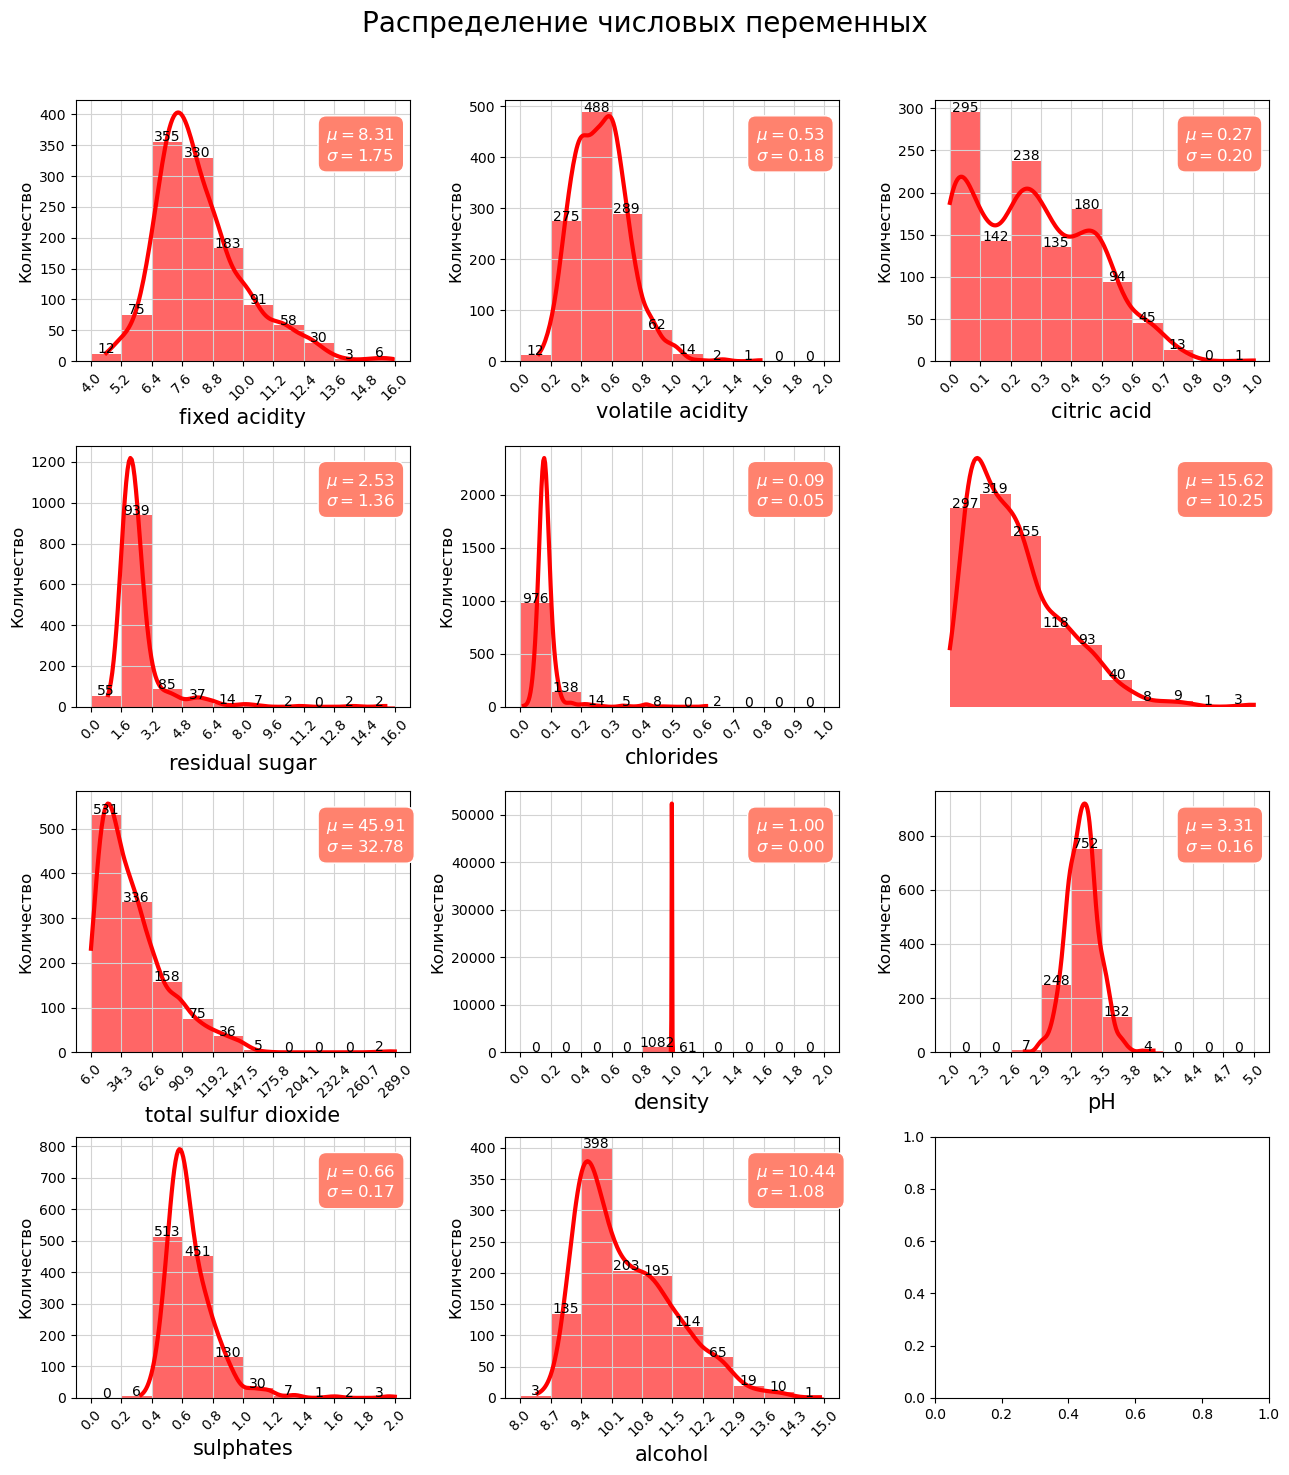

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(13, 15), )

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10)

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

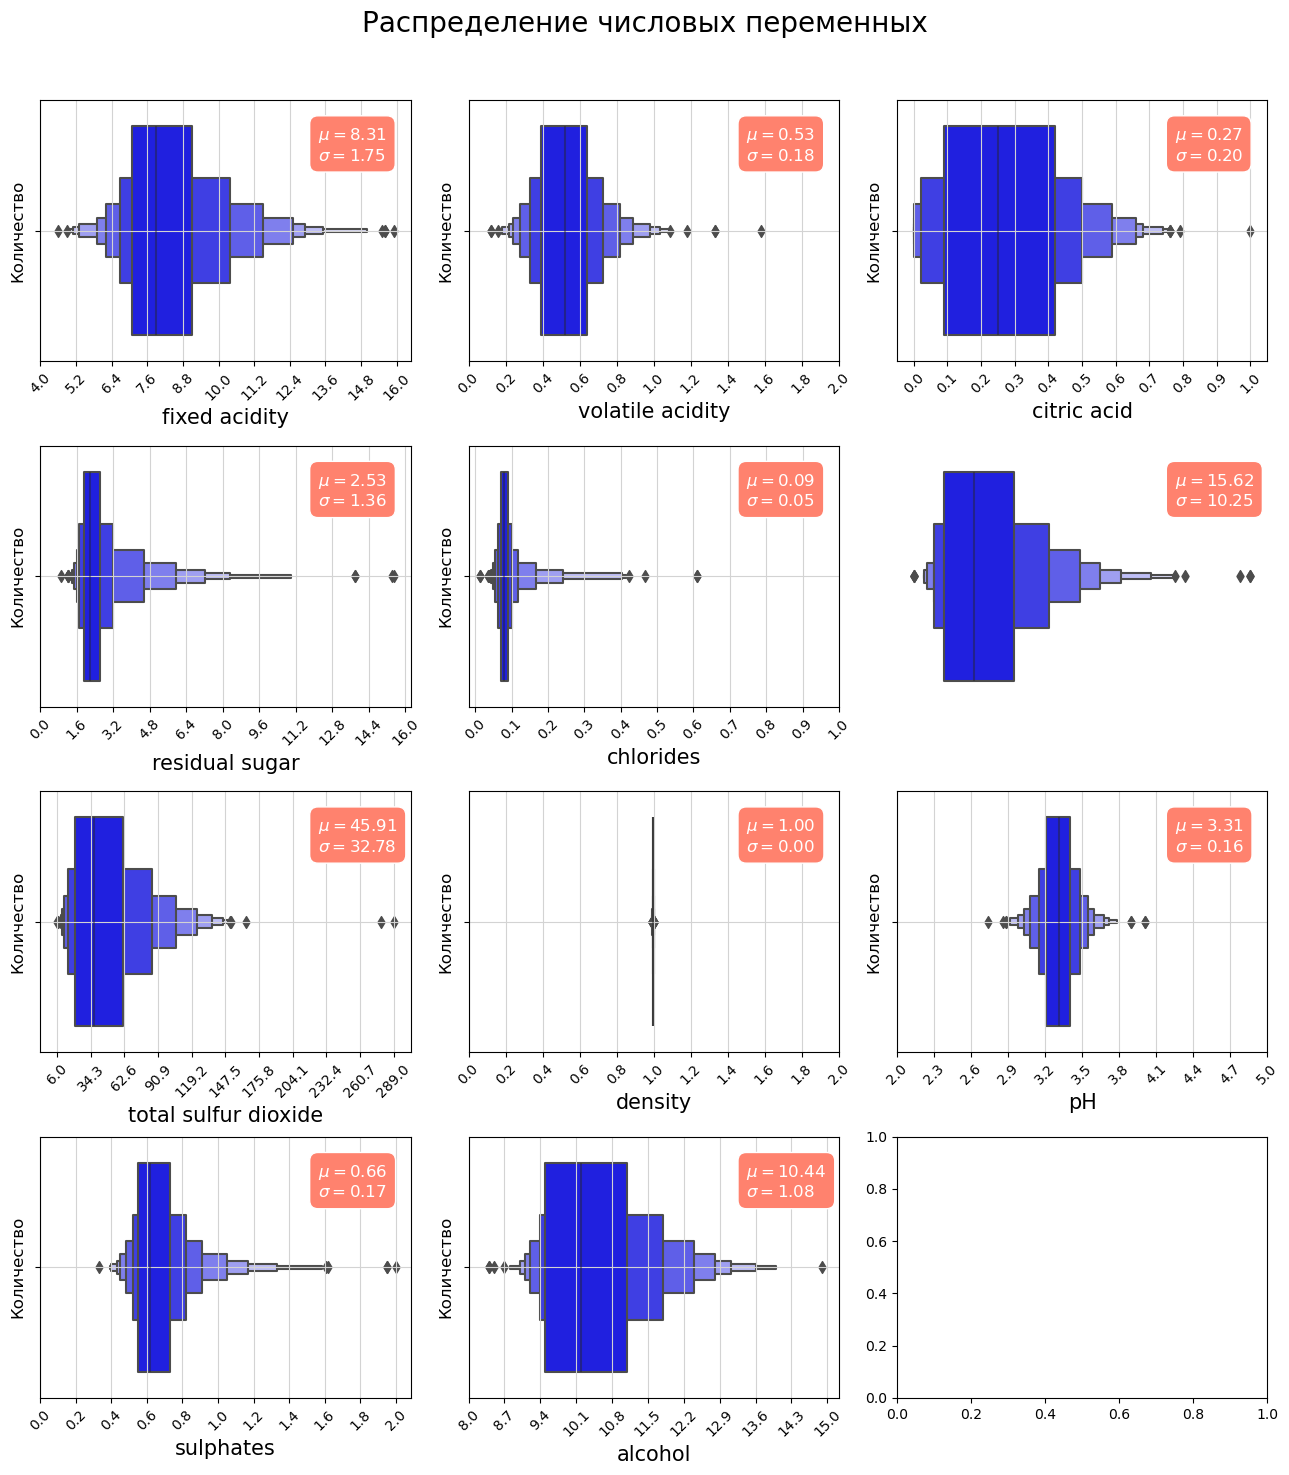

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(13, 15))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Типы распределения видны на графиках, средние значения и дисперсии тоже. Так же можно увидеть значения, сильно выходящий на рамки обычных, но для принятия решения, насколько они относятся к выбросам, нужно проконсультироваться со специалистами по винам.

### Одномерный анализ категориальных переменных
категориальная переменная у нас одна, quality, она же целевая. Посмотрим на ее гистограмму

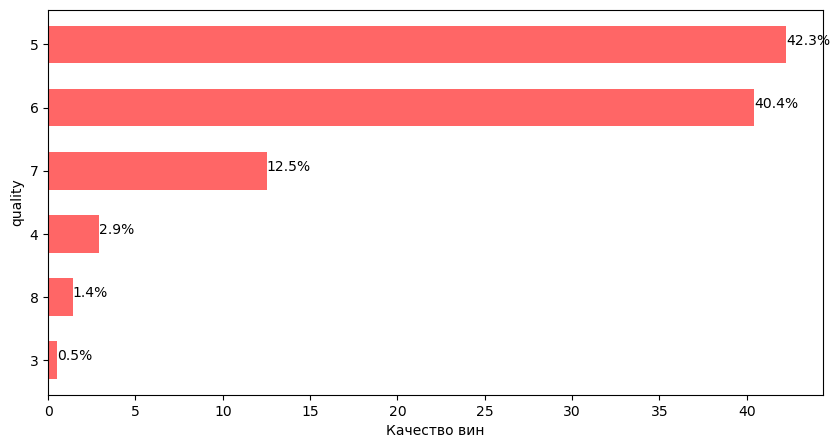

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

# Вычисление процентных значений частоты красных вин
value_counts_w = df_wine.quality.value_counts(normalize=True).mul(100).sort_values()

# Построение столбчатой диаграммы
value_counts_w.plot(kind='barh', width=0.6, color='red', alpha=0.6)
for index, value in enumerate(value_counts_w):
        ax.text(value, index, str(round(value, 1)) + '%', fontsize=10)
        ax.set_xlabel('Качество вин', fontsize=10)

По результатам гистограммы видим, что вин больше всего с оценкой качества равной 5 - 42,3%


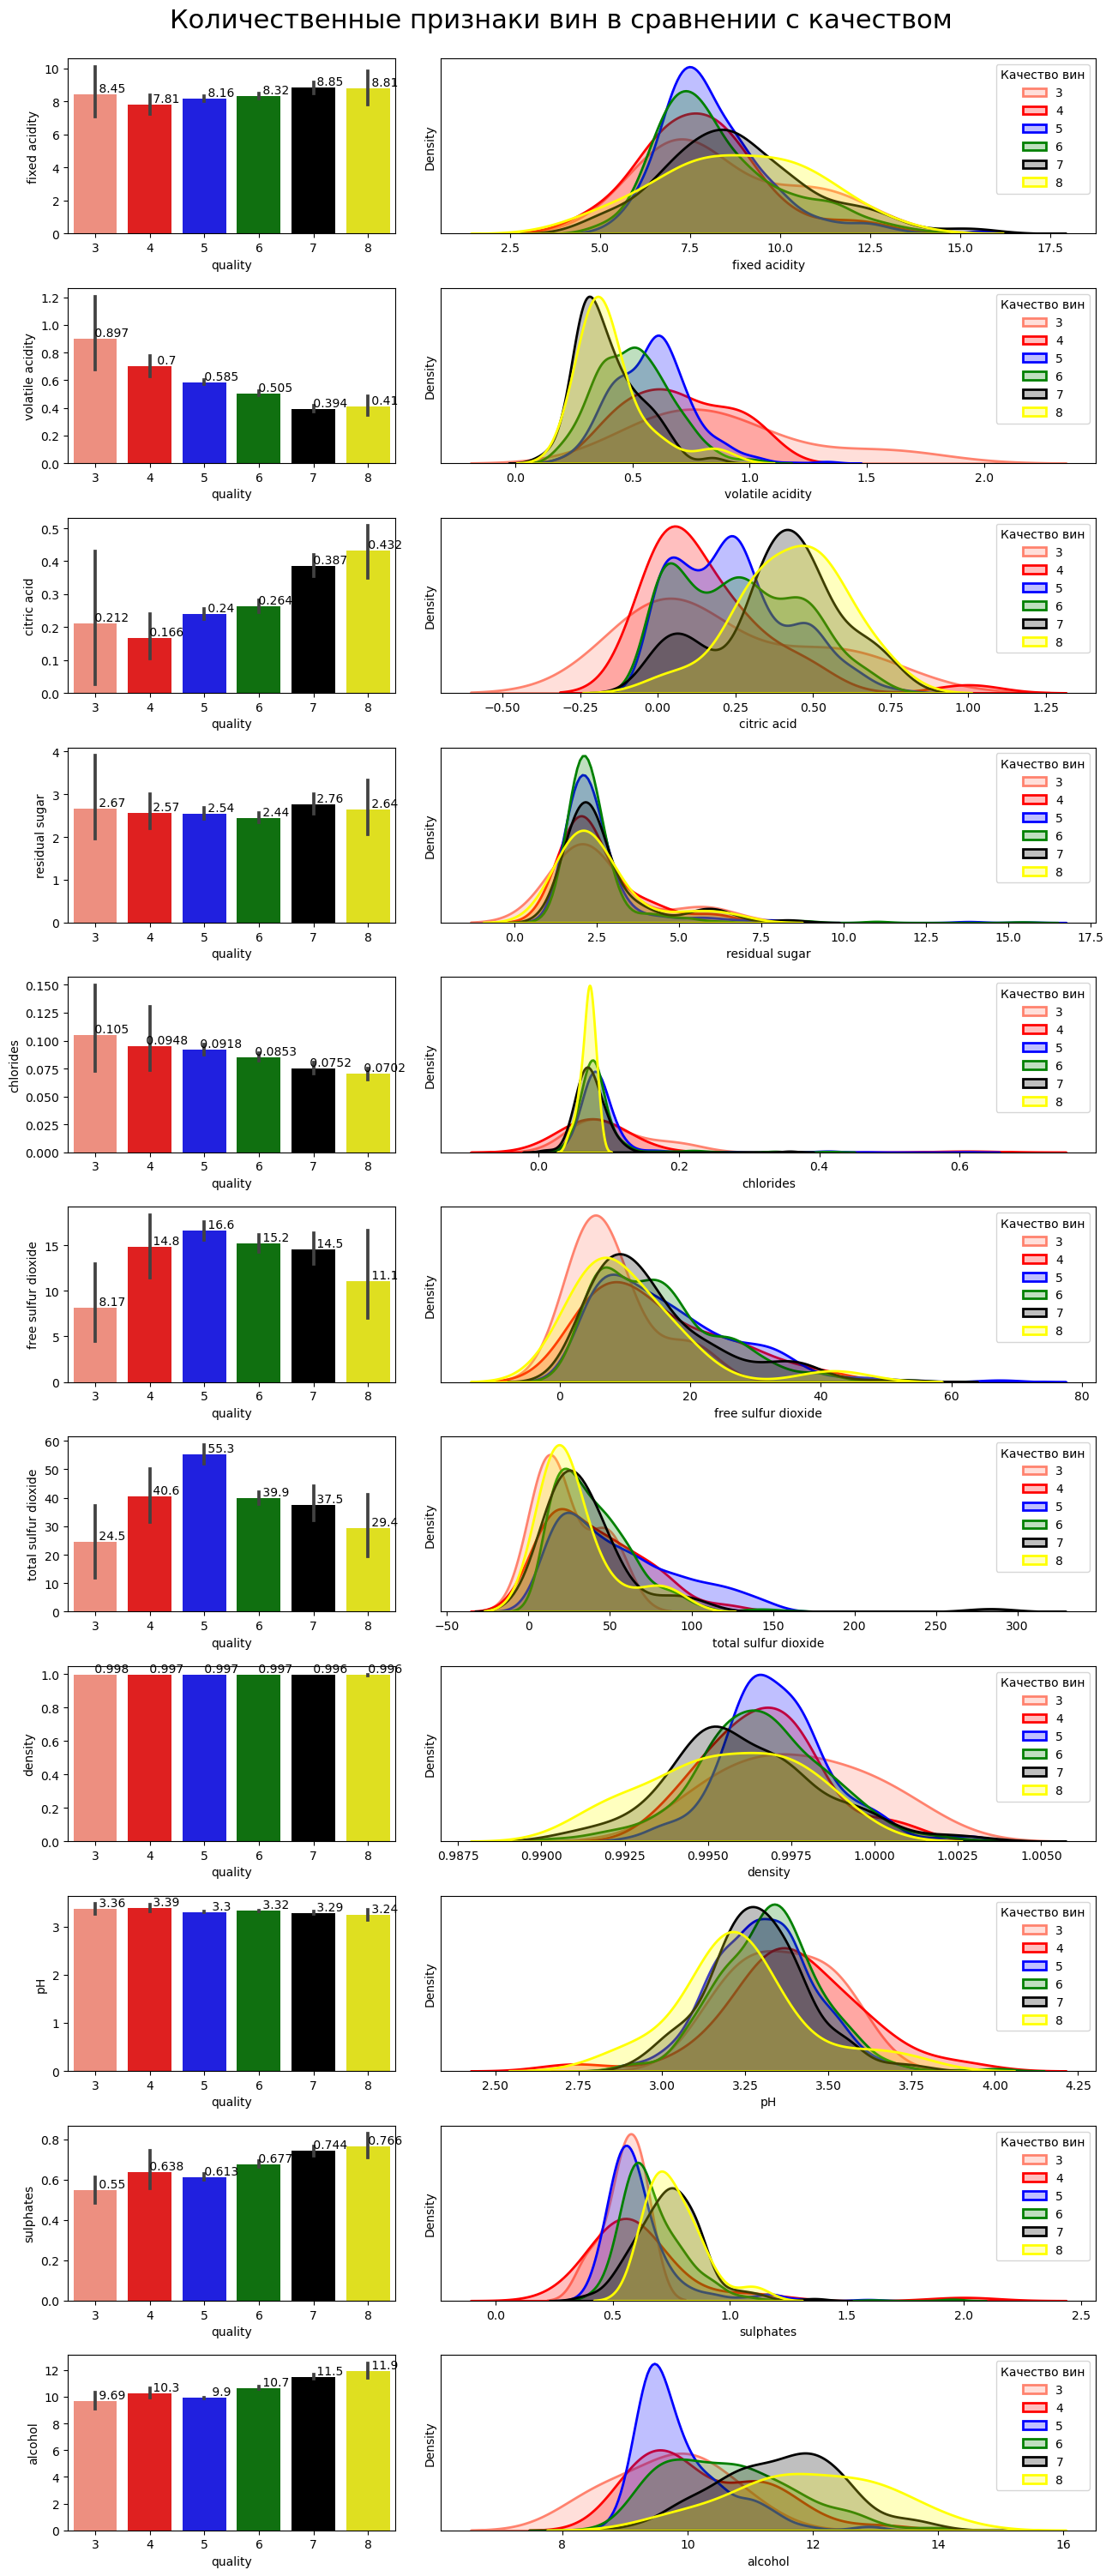

In [11]:
#Построим кривые взаимосвязи каждого признака с целевой переменной - качеством вина для красных вин

sns.set_palette(['#ff826e', 'red', 'blue', 'green', 'black', 'yellow', 'orange', 'pink', 'brown', 'purple', 'white'])
fig, ax = plt.subplots(len(df_wine.columns)-1, 2, figsize=(13,30), gridspec_kw={'width_ratios': [1, 2]})

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(df_wine.columns[:-1]):
    # Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_wine, x="quality", y=col, ax=ax[i,0])

    # График KDE, показывающий распределение признака для каждой целевой категории
    sns.kdeplot(data=df_wine[df_wine["quality"]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    sns.kdeplot(data=df_wine[df_wine["quality"]==4], x=col, fill=True, linewidth=2, ax=ax[i,1], label='4')
    sns.kdeplot(data=df_wine[df_wine["quality"]==5], x=col, fill=True, linewidth=2, ax=ax[i,1], label='5')
    sns.kdeplot(data=df_wine[df_wine["quality"]==6], x=col, fill=True, linewidth=2, ax=ax[i,1], label='6')
    sns.kdeplot(data=df_wine[df_wine["quality"]==7], x=col, fill=True, linewidth=2, ax=ax[i,1], label='7')
    sns.kdeplot(data=df_wine[df_wine["quality"]==8], x=col, fill=True, linewidth=2, ax=ax[i,1], label='8')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Качество вин', loc='upper right')

    # средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Количественные признаки вин в сравнении с качеством', fontsize=22, x= 0.5 , y=1.0)
plt.tight_layout()
plt.show()

In [12]:
#посмотрим коэффициенты корреляции признаков с качеством для красных вин
corr_red=df_wine.corr()['quality']
corr_red

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

In [14]:
# Сделайте выводы о качестве данных и потенциальных взаимосвязях.

In [13]:
for i, c in enumerate(corr_red[:-1]):
    # print(i,c, df_red_wine.columns[i])
    if 0<c<0.3:
        print(f'Слабая положительная зависимость с {df_wine.columns[i]} = {round(c, 2)}')
    elif -0.3<=c<0:
        print(f'Слабая отрицательная зависимость с {df_wine.columns[i]} = {round(c, 2)}') 
    elif 0.3<=c<0.7:
        print(f'Средняя положительная зависимость с {df_wine.columns[i]} = {round(c, 2)}')       
    elif -0.7<c<=0.3:
        print(f'Средняя отрицательная зависимость с {df_wine.columns[i]} = {round(c, 2)}')       
    elif c>=0.7:
        print(f'Сильная положительная зависимость с {df_wine.columns[i]} = {round(c, 2)}') 
    elif c<=-0.7:
        print(f'Сильная отрицательная зависимость с {df_wine.columns[i]} = {round(c, 2)}') 

Слабая положительная зависимость с fixed acidity = 0.12
Средняя отрицательная зависимость с volatile acidity = -0.41
Слабая положительная зависимость с citric acid = 0.24
Слабая положительная зависимость с residual sugar = 0.02
Слабая отрицательная зависимость с chlorides = -0.12
Слабая отрицательная зависимость с free sulfur dioxide = -0.06
Слабая отрицательная зависимость с total sulfur dioxide = -0.18
Слабая отрицательная зависимость с density = -0.18
Слабая отрицательная зависимость с pH = -0.05
Слабая положительная зависимость с sulphates = 0.26
Средняя положительная зависимость с alcohol = 0.48
